In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [12]:
linearcoord = loadmat('/stelmo/anna/remy/filterframework/decoding/set_arm_nodes.mat')['linearcoord_one_box'][0]



In [19]:
from loren_frank_data_processing.position import _get_pos_dataframe
from  loren_frank_data_processing import Animal
ANIMALS = {
    'fievel': Animal(directory=('/stelmo/anna/fievel/filterframework/'), short_name='fievel'),
}
epoch_key = ('fievel',19,4)
position_info = _get_pos_dataframe(epoch_key, ANIMALS)

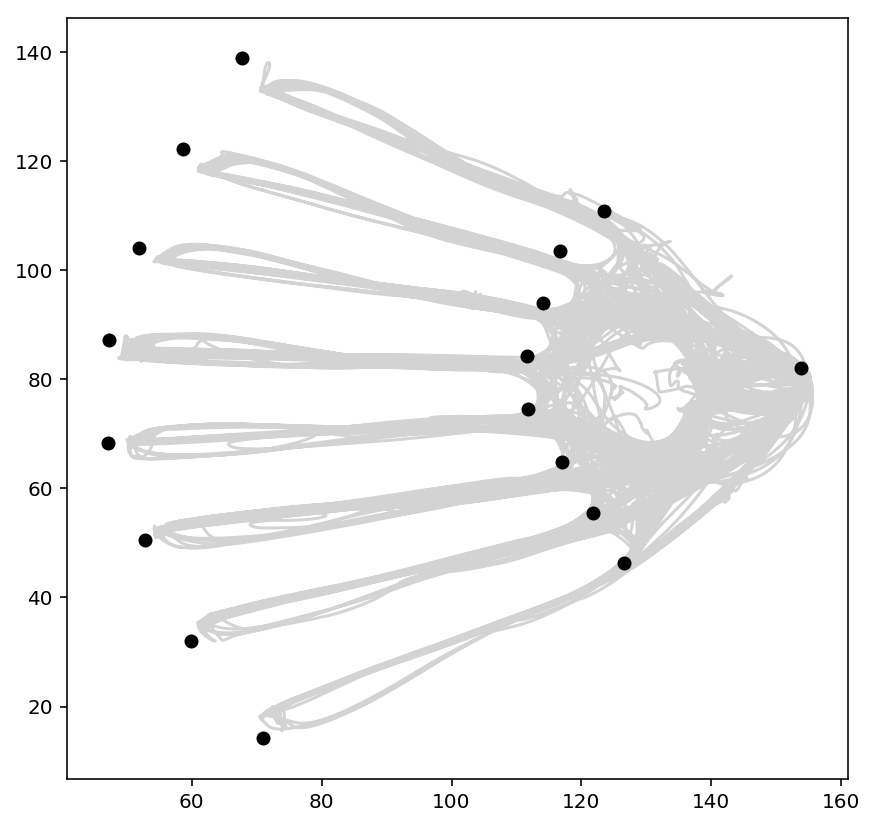

In [21]:
center_well_position = linearcoord[0][0]
nodes = [center_well_position[np.newaxis, :]]
for arm in linearcoord:
    for point in arm[1:]:
        nodes.append(point[np.newaxis, :])

nodes = np.concatenate(nodes)
plt.figure(figsize=(7, 7))
plt.plot(position_info.x_position, position_info.y_position, color='lightgrey')
plt.scatter(nodes[:, 0], nodes[:, 1], zorder=10, color='black')

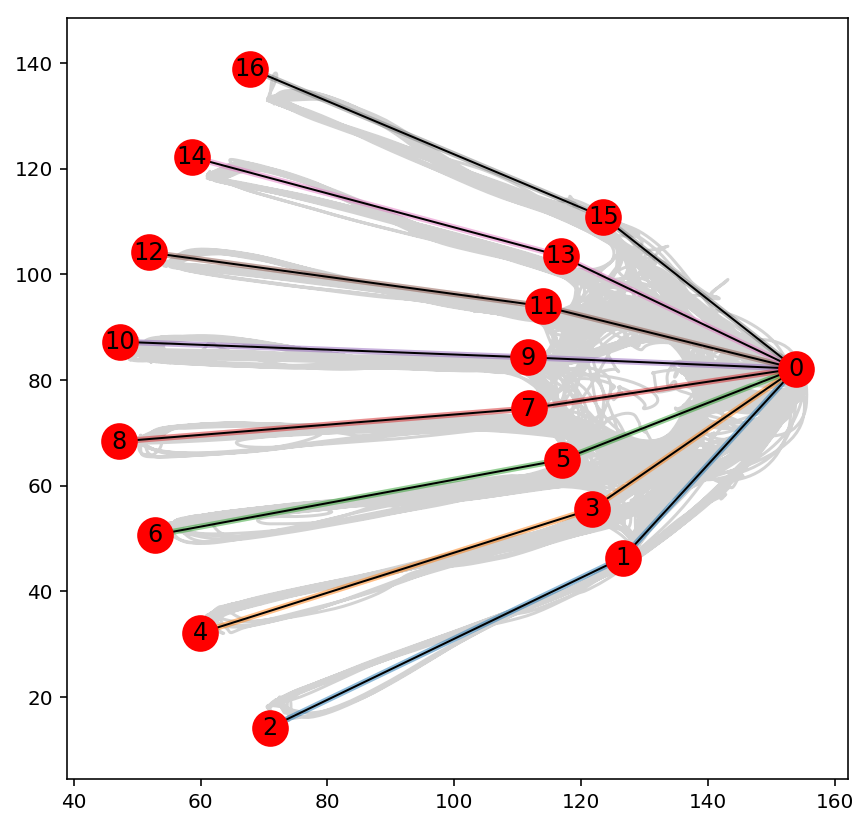

In [22]:
dist = []
for arm in linearcoord:
    dist.append(np.linalg.norm(np.diff(arm, axis=0), axis=1))

np.stack([*dist])
edges = [(0, 1),
(1, 2),
(0, 3),
(3, 4),
(0, 5),
(5, 6),
(0, 7),
(7, 8),
(0, 9),
(9, 10),
(0, 11),
(11, 12),
(0, 13),
(13, 14),
(0, 15),
(15, 16)]
edge_distances = np.concatenate([*dist])
import networkx as nx
from loren_frank_data_processing.track_segment_classification import plot_track
plt.figure(figsize=(7, 7))
plt.plot(position_info.x_position, position_info.y_position, color='lightgrey', zorder=-1)
track_graph = nx.Graph()
for node_id, node_position in enumerate(nodes):
    track_graph.add_node(node_id, pos=tuple(node_position))
for edge, distance in zip(edges, edge_distances):
    track_graph.add_edge(edge[0], edge[1], distance=distance)
for arm in linearcoord:
    plt.plot(arm[:, 0], arm[:, 1], linewidth=3, zorder=0, alpha=0.5)
plot_track(track_graph)

In [23]:
from loren_frank_data_processing.track_segment_classification import classify_track_segments
position = position_info.loc[:, ['x_position', 'y_position']].values
track_segment_id = classify_track_segments(
 track_graph, position,
 route_euclidean_distance_scaling=1,
 sensor_std_dev=1)

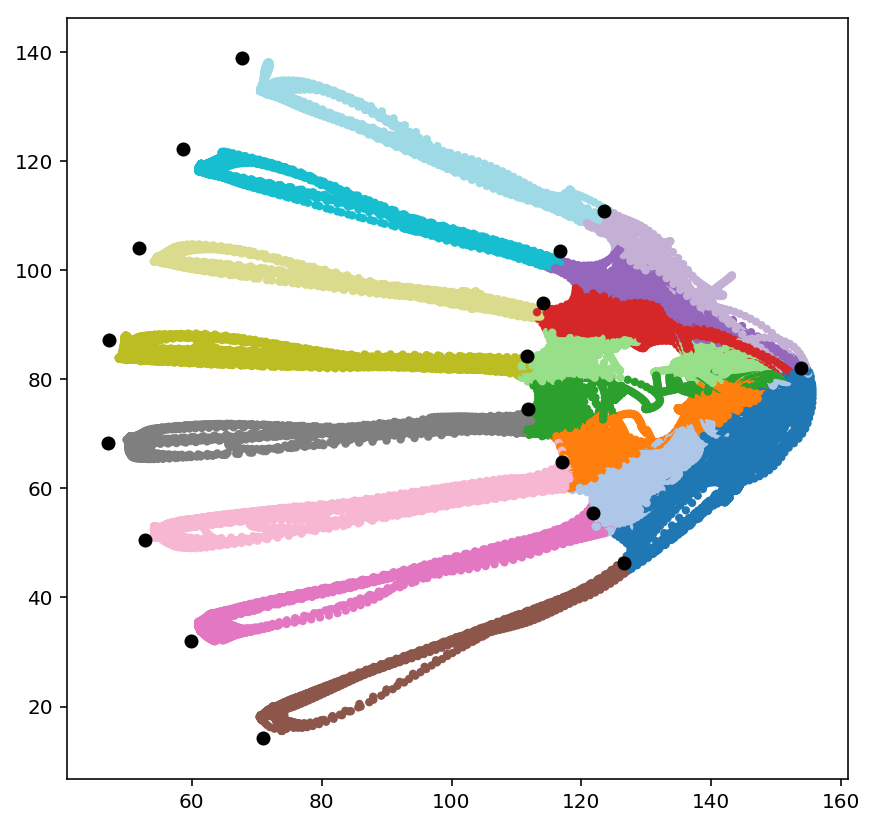

In [24]:
plt.figure(figsize=(7, 7))
plt.scatter(position[:, 0], position[:, 1], c=track_segment_id,
 cmap='tab20', s=10)
plt.scatter(nodes[:, 0], nodes[:, 1], zorder=10, color='black')

In [25]:
from loren_frank_data_processing.track_segment_classification import calculate_linear_distance
center_well_id = 0
linear_distance = calculate_linear_distance(
 track_graph, track_segment_id, center_well_id, position)

(10097.081933, 15605.348402)

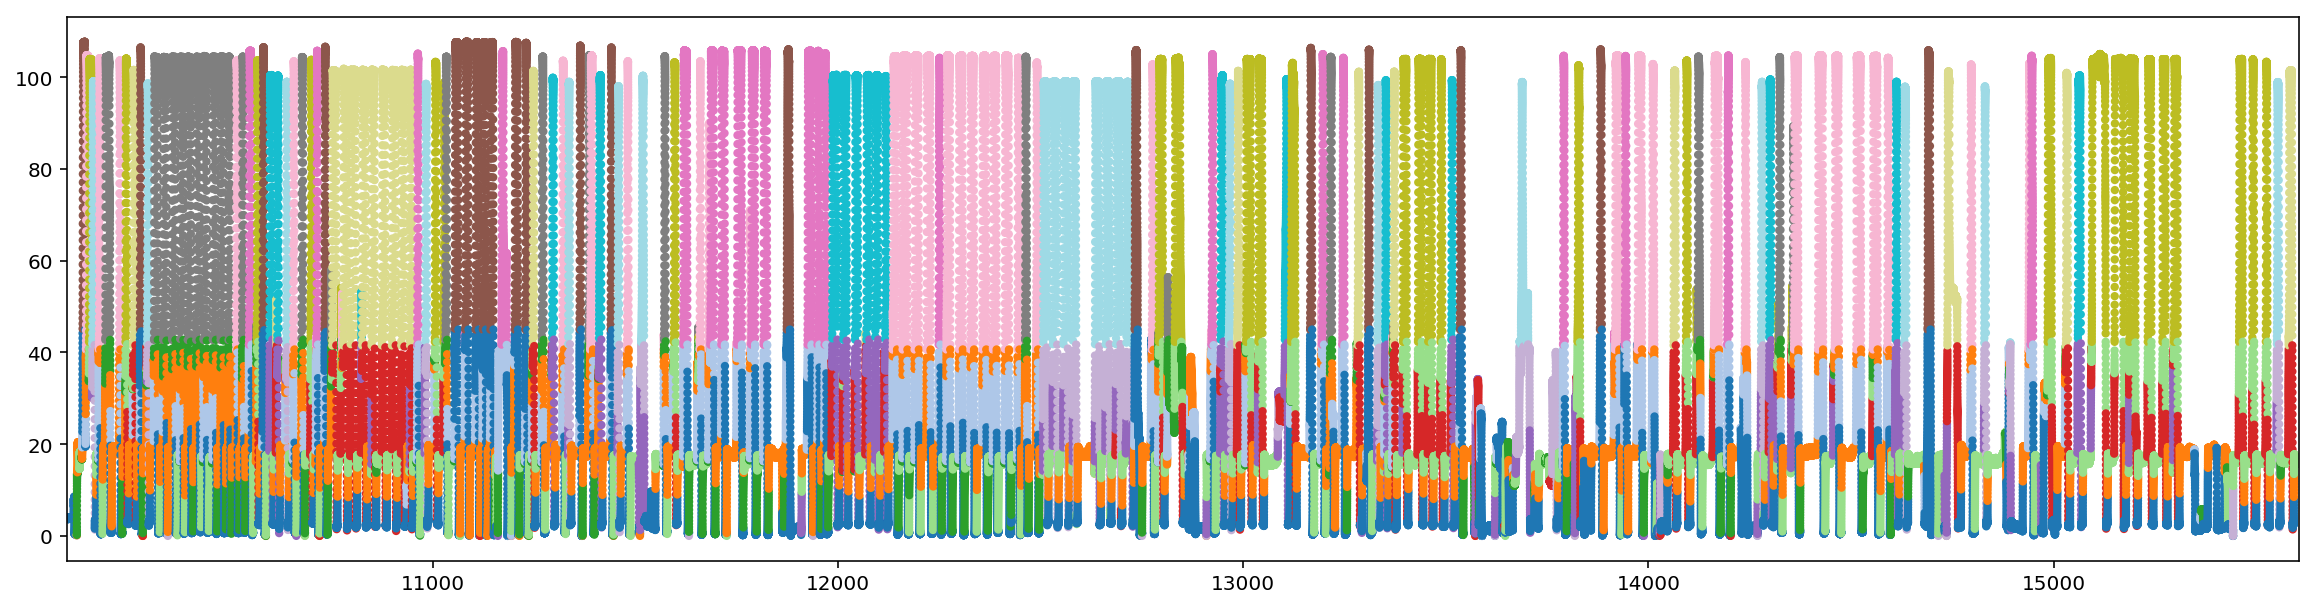

In [26]:
plt.figure(figsize=(20, 5))
time = position_info.index / np.timedelta64(1,'s')
plt.scatter(time, linear_distance,
 s=10, c=track_segment_id, cmap='tab20')
plt.xlim((time.min(), time.max()))

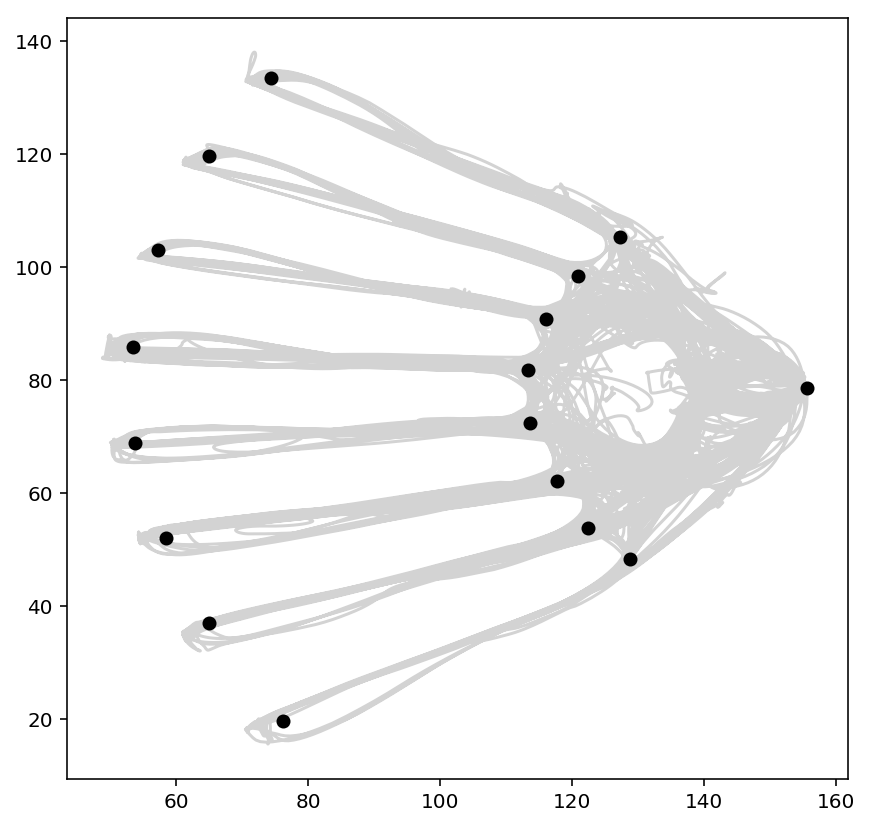

In [29]:
linearcoord = loadmat('/home/anna/Src/Python/fievel_new_arm_nodes.mat')['linearcoord_one_box'][0]
center_well_position = linearcoord[0][0]
nodes = [center_well_position[np.newaxis, :]]
for arm in linearcoord:
    for point in arm[1:]:
        nodes.append(point[np.newaxis, :])

nodes = np.concatenate(nodes)
plt.figure(figsize=(7, 7))
plt.plot(position_info.x_position, position_info.y_position, color='lightgrey')
plt.scatter(nodes[:, 0], nodes[:, 1], zorder=10, color='black')

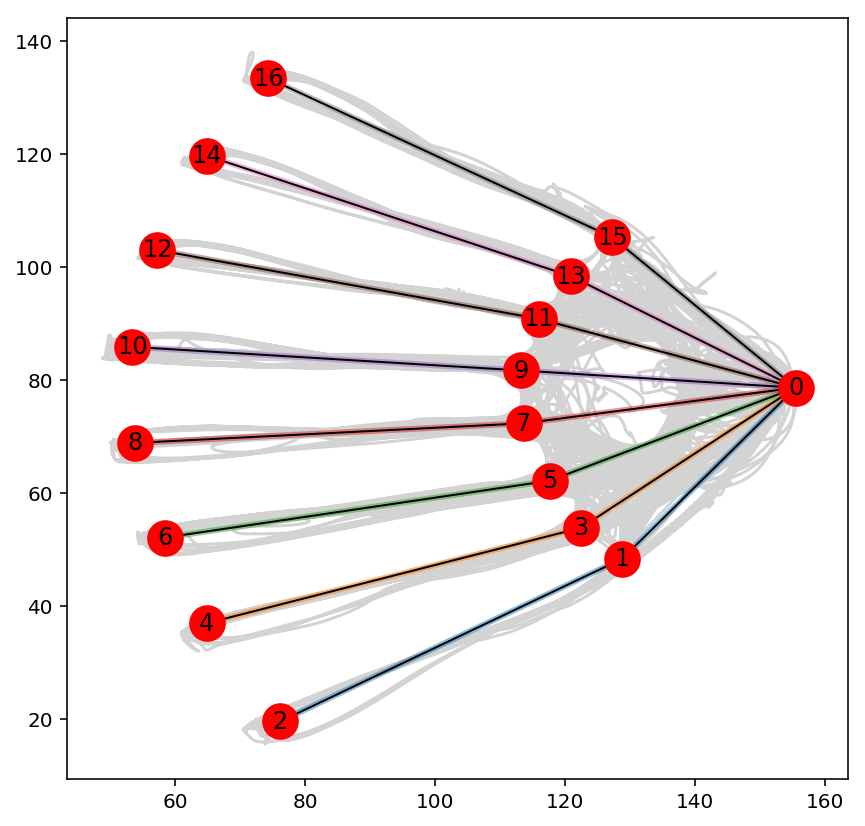

In [30]:
dist = []
for arm in linearcoord:
    dist.append(np.linalg.norm(np.diff(arm, axis=0), axis=1))

np.stack([*dist])
edges = [(0, 1),
(1, 2),
(0, 3),
(3, 4),
(0, 5),
(5, 6),
(0, 7),
(7, 8),
(0, 9),
(9, 10),
(0, 11),
(11, 12),
(0, 13),
(13, 14),
(0, 15),
(15, 16)]
edge_distances = np.concatenate([*dist])
import networkx as nx
from loren_frank_data_processing.track_segment_classification import plot_track
plt.figure(figsize=(7, 7))
plt.plot(position_info.x_position, position_info.y_position, color='lightgrey', zorder=-1)
track_graph = nx.Graph()
for node_id, node_position in enumerate(nodes):
    track_graph.add_node(node_id, pos=tuple(node_position))
for edge, distance in zip(edges, edge_distances):
    track_graph.add_edge(edge[0], edge[1], distance=distance)
for arm in linearcoord:
    plt.plot(arm[:, 0], arm[:, 1], linewidth=3, zorder=0, alpha=0.5)
plot_track(track_graph)

In [31]:
from loren_frank_data_processing.track_segment_classification import classify_track_segments
position = position_info.loc[:, ['x_position', 'y_position']].values
track_segment_id = classify_track_segments(
 track_graph, position,
 route_euclidean_distance_scaling=1,
 sensor_std_dev=1)

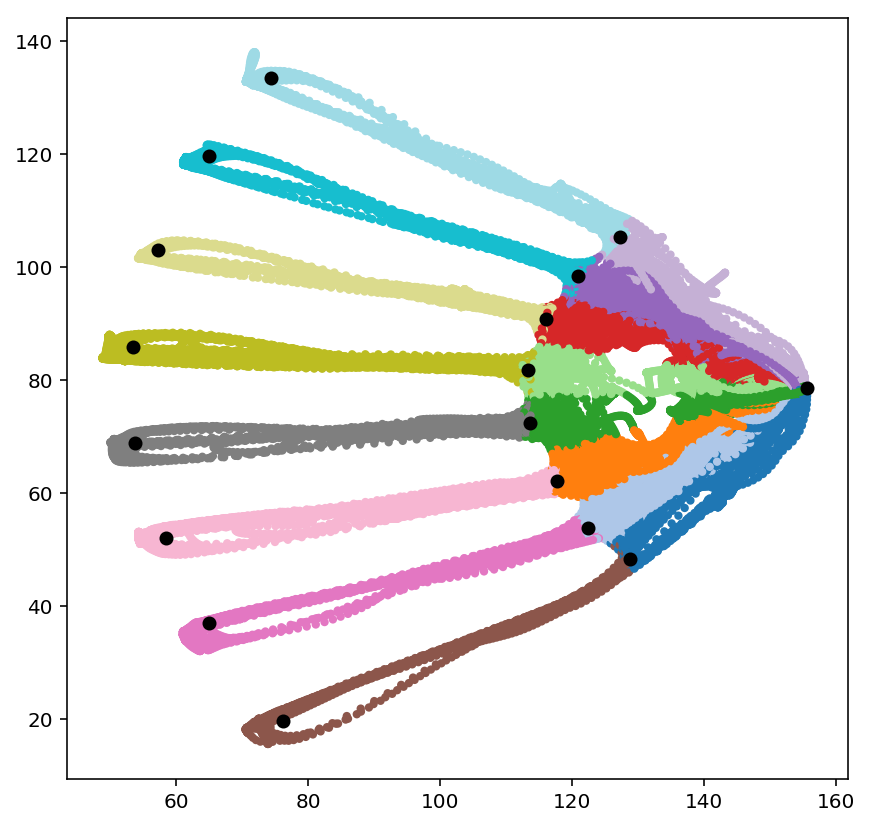

In [33]:
plt.figure(figsize=(7, 7))
plt.scatter(position[:, 0], position[:, 1], c=track_segment_id,
 cmap='tab20', s=10)
plt.scatter(nodes[:, 0], nodes[:, 1], zorder=10, color='black')

In [32]:
from loren_frank_data_processing.track_segment_classification import calculate_linear_distance
center_well_id = 0
linear_distance = calculate_linear_distance(
 track_graph, track_segment_id, center_well_id, position)

(10097.081933, 15605.348402)

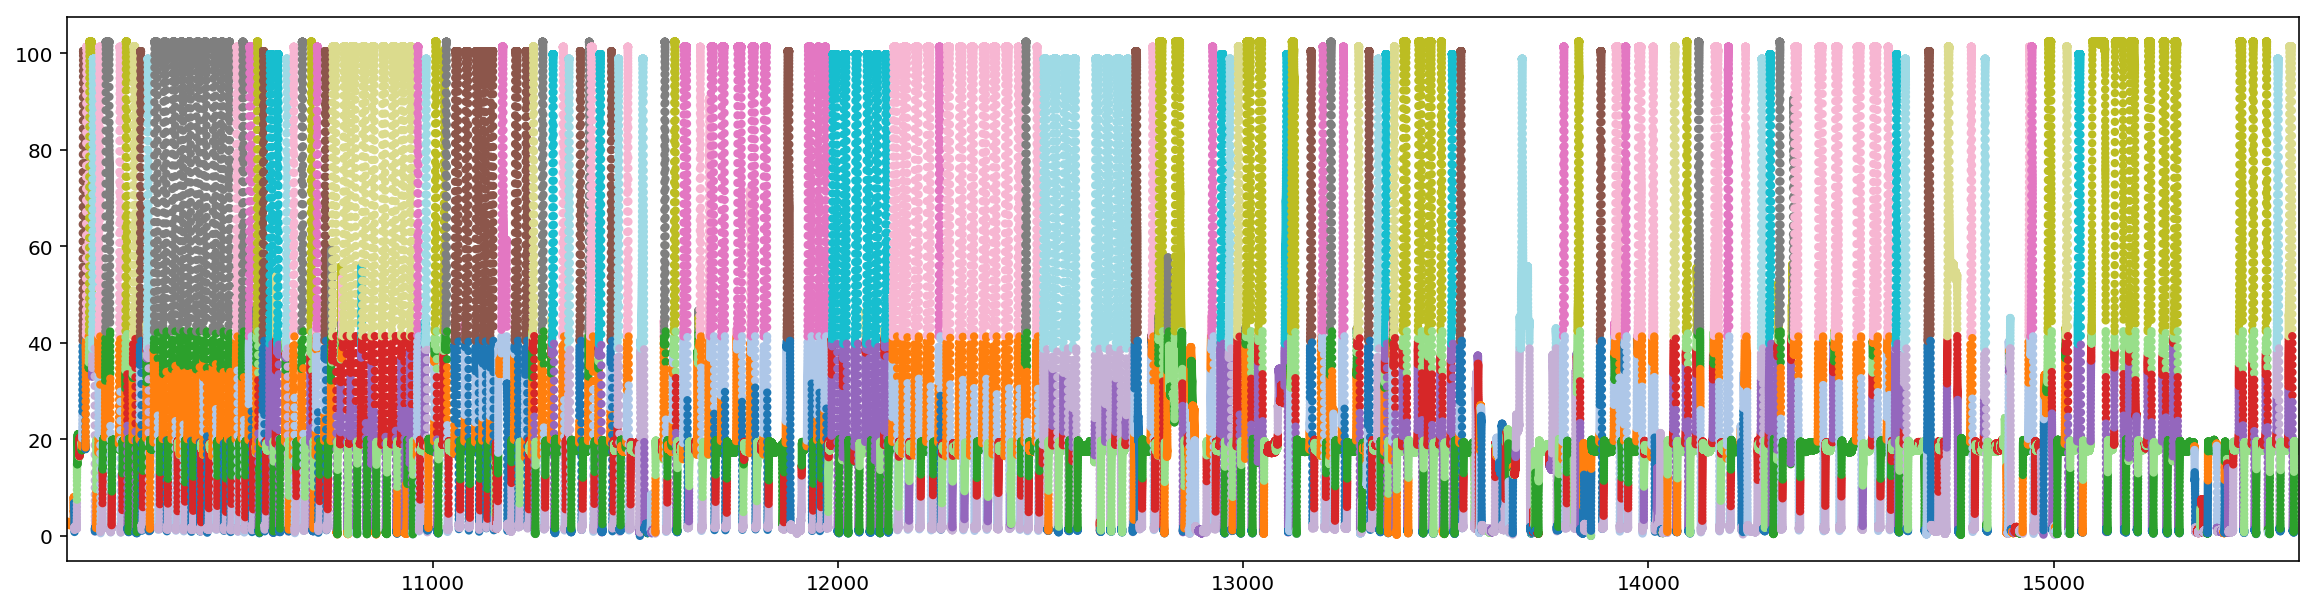

In [34]:
plt.figure(figsize=(20, 5))
time = position_info.index / np.timedelta64(1,'s')
plt.scatter(time, linear_distance,
 s=10, c=track_segment_id, cmap='tab20')
plt.xlim((time.min(), time.max()))

(11000, 11200)

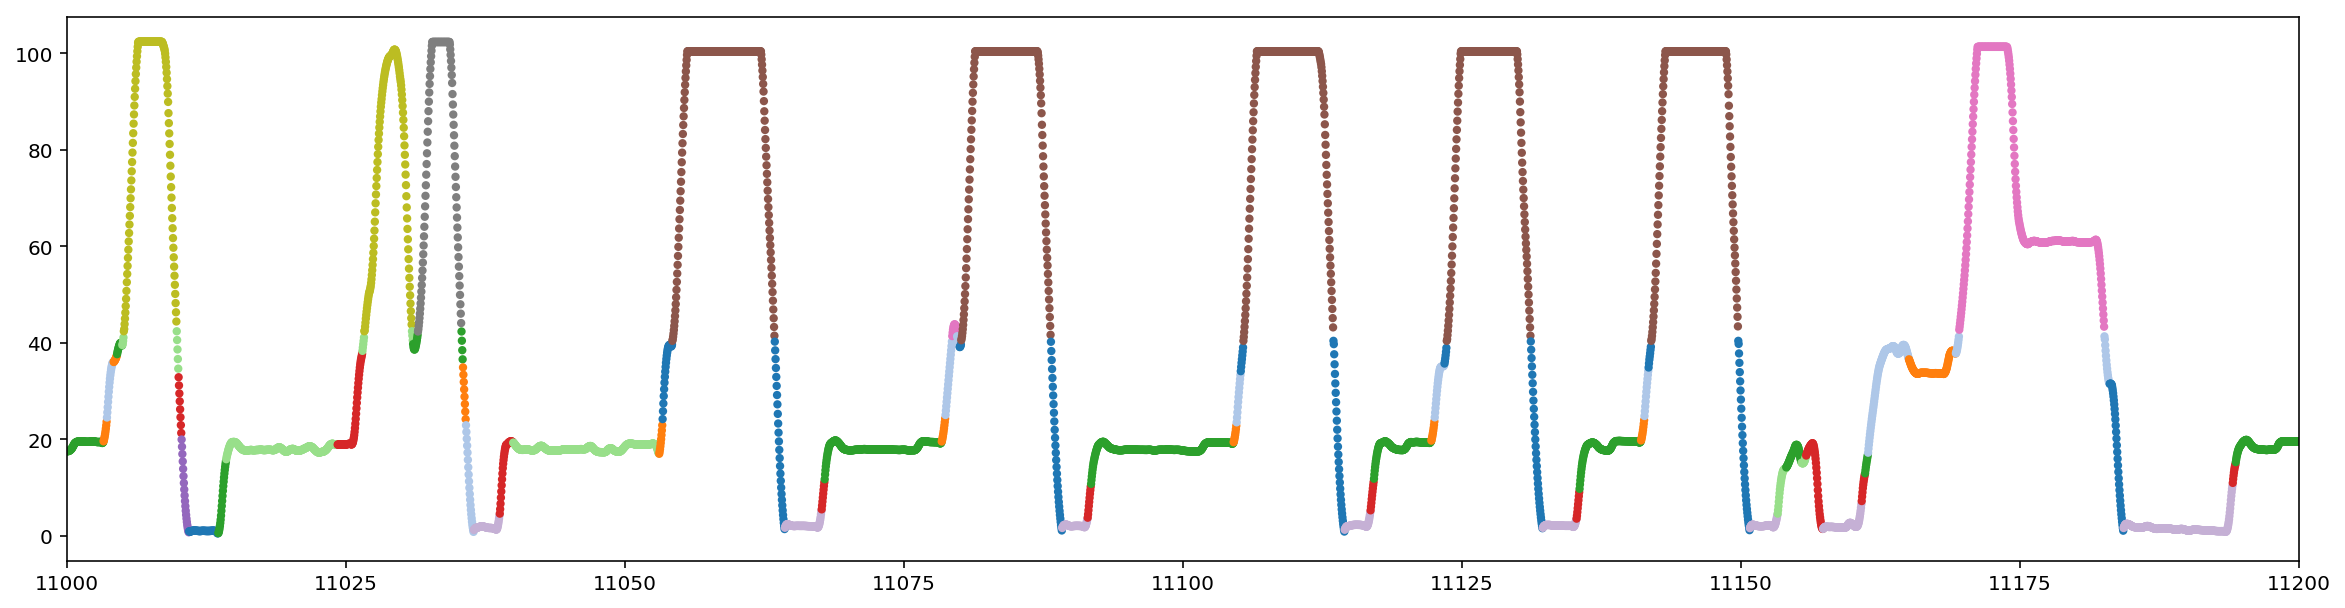

In [36]:
plt.figure(figsize=(20, 5))
time = position_info.index / np.timedelta64(1,'s')
plt.scatter(time, linear_distance,
 s=10, c=track_segment_id, cmap='tab20')
plt.xlim((11000, 11200))

In [41]:
arm_distances = (edge_distances[1],edge_distances[3],edge_distances[5],edge_distances[7],
                        edge_distances[9],edge_distances[11],edge_distances[13],edge_distances[15])

shift_linear_distance_by_arm_dictionary = dict() # initialize empty dictionary 

hardcode_armorder = [0,1,2,3,4,5,6,7]
gap_size=20
for arm in enumerate(hardcode_armorder): # for each outer arm
    if arm[0] == 0: # if first arm, just shift hardcode_shiftamount
        temporary_variable_shift = gap_size
    else: # if not first arm, add to hardcode_shiftamount length of previous arm 
        temporary_variable_shift = gap_size + arm_distances[arm[0]] + shift_linear_distance_by_arm_dictionary[hardcode_armorder[arm[0] - 1]]
    shift_linear_distance_by_arm_dictionary[arm[1]] = temporary_variable_shift

        # Modify: 1) collapse non-arm locations (segments 0-7), 
        # 2) shift linear distance for the 8 arms (segments 8-15)
newseg = np.copy(track_segment_id)
newseg[(newseg < 8)] = 0

In [44]:
linear_distance_arm_shift = np.copy(linear_distance)
for seg in shift_linear_distance_by_arm_dictionary:
    linear_distance_arm_shift[(newseg==(seg+8))]+=shift_linear_distance_by_arm_dictionary[(seg)]  

(10097.081933, 15605.348402)

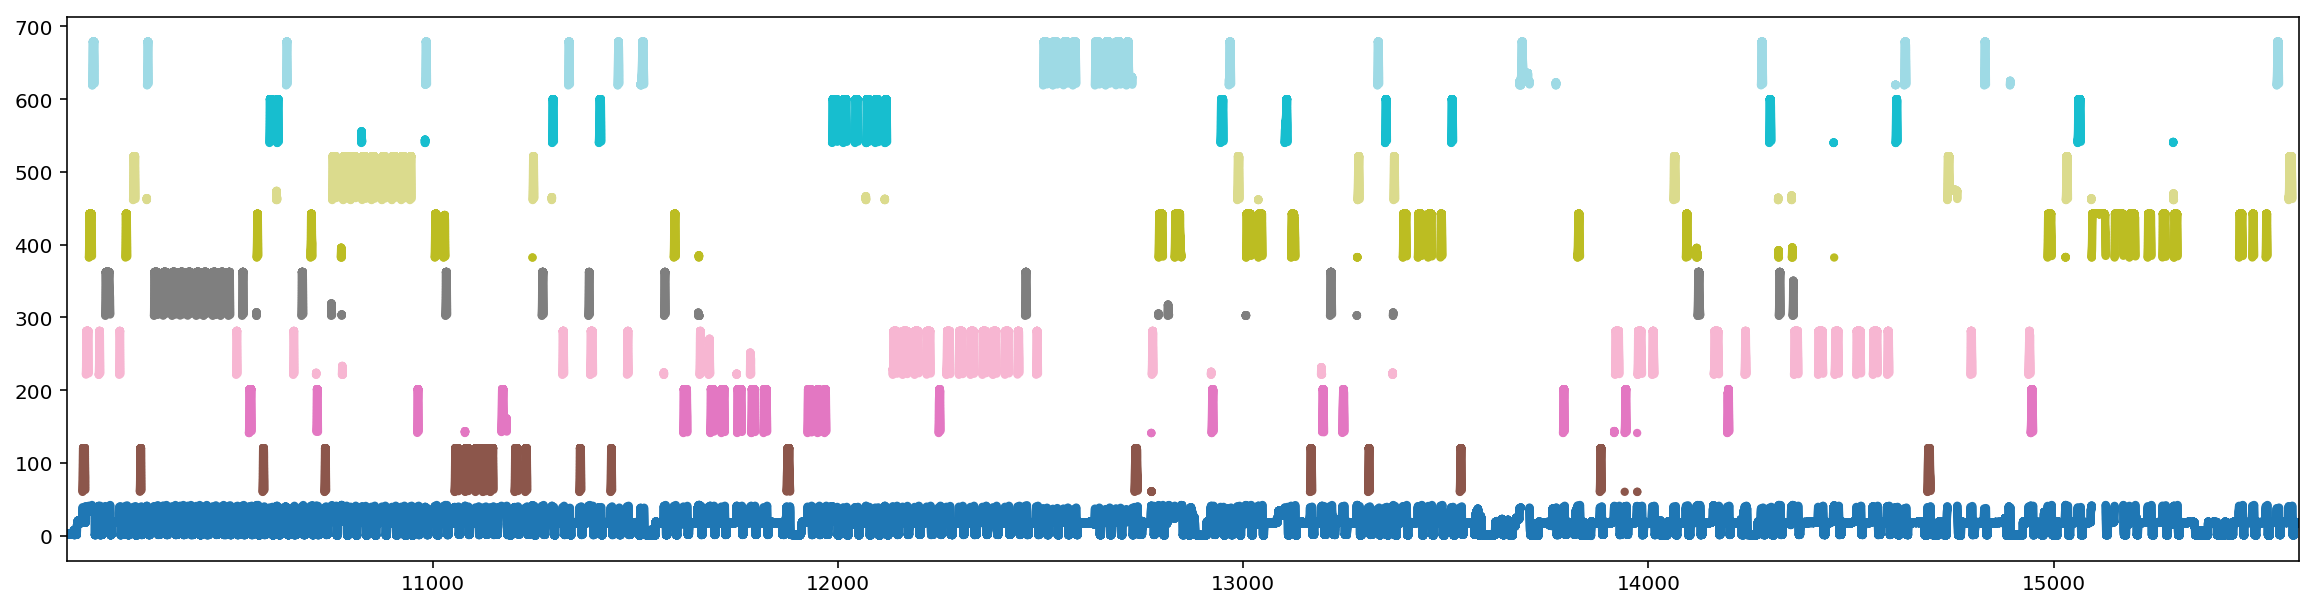

In [45]:
plt.figure(figsize=(20, 5))
time = position_info.index / np.timedelta64(1,'s')
plt.scatter(time, linear_distance_arm_shift,
 s=10, c=newseg, cmap='tab20')
plt.xlim((time.min(), time.max()))

In [69]:
lindist_floor = np.floor(linear_distance_arm_shift)

In [52]:
def turn_array_into_ranges(array1):
    array1_diff = np.ediff1d(array1)

    start_temp = [] 
    end_temp = []
    start_temp.append(array1[0]) 

    some_end_indices = np.where(array1_diff > 1)

    for i in range(len(some_end_indices[0])):
        # This is always an end index
        end_temp.append(array1[some_end_indices[0][i]])
        if array1[some_end_indices[0][i]] == start_temp[i]: # if this is the same as the last start index, it was already added as a start index-- don't need to add it again
            start_temp.append(array1[some_end_indices[0][i] + 1]) # define next start index   
        elif array1_diff[some_end_indices[0][i] - 1] > 1: # if last value was more than 1 away, this is also a start index
            start_temp.append(array1[some_end_indices[0][i]])    
        else: # if last value was NOT more than 1 away, this is JUST an end index, and next start index is next index
            start_temp.append(array1[some_end_indices[0][i] + 1])   
    # The last entry in array is always the last end index
    end_temp.append(array1[-1])  

    return start_temp, end_temp

In [70]:
track_segments = np.unique(newseg)
seg_pos_range = []
seg_pos_range_edges = [] 
for seg in track_segments:
    seg_inds = newseg==seg      #get index of positions on that segment
    seg_pos = lindist_floor[seg_inds]    # store those positions (pos only, not vel)
    seg_pos_range.append([seg_pos.min() ,seg_pos.max()])    # get min and max vals per segment
    seg_pos_range_edges.append([np.floor(seg_pos.min()), np.ceil(seg_pos.max())])

binswewant_tmp = []
for seg_range in np.floor(seg_pos_range_edges): # for each track segment
    binswewant_tmp.append(np.arange(seg_range[0],seg_range[1]+1)) # + 1 to account for np.arange not including last index

occupied_bins = np.unique(np.concatenate(binswewant_tmp))   # concatenate and get rid of duplicate bins from box segs
arm_coordinates = np.column_stack(turn_array_into_ranges(occupied_bins))   #  get start & end of each region

In [78]:
armcoordinates_corrected = []
pos_bins = []
for arm in np.arange(0,arm_coordinates.shape[0],1):
    arm_bounds = arm_coordinates[arm]
        # add to arm edge value to make it divisible by posbin. each arm starts at the node, and now will end some 5cm bins later
    remainder = np.mod((arm_bounds[1]-arm_bounds[0]),5)   
    if remainder: 
        extra_needed = 5-remainder     
    else:
        extra_needed = 0
    new_bounds = [arm_bounds[0], arm_bounds[1]+extra_needed]
    armcoordinates_corrected.append(new_bounds)
        # construct pos bin edges. this is not just a range, because the gaps are not strictly 5cm (thanks to the adjustments above)
    pos_bins.append(np.arange(new_bounds[0],new_bounds[1]+1,5))   
    if arm_bounds[1] < arm_coordinates[-1,-1]:  
        pos_bins.append(np.arange(new_bounds[1],arm_coordinates[arm+1][0]+1,5))  # add gap bins
        

In [79]:
pos_bins = np.unique(np.concatenate(pos_bins))  # analog to mike's position_bins
print(pos_bins)

armcoordinates_binned = []     # find the indexes of the arm ends (mike's new_arm_coords)
for end in armcoordinates_corrected:
    startind=np.where(pos_bins == end[0])
    endind = np.where(pos_bins == end[1])
    armcoordinates_binned.append([startind[0][0],endind[0][0]-1])
armcoordinates_binned = np.array(armcoordinates_binned)

print(armcoordinates_binned)

    # bin linearized position data with these bins
    # digitize returns the bin index for each value, converting position measure into binindex measure (1-based)
digitized = np.digitize(lindist_floor, pos_bins)
binned_linear_pos = digitized-1  # -1  for python 0-based

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 141. 146. 151. 156. 161. 166. 171. 176. 181. 186. 191. 196. 201.
 206. 211. 216. 221. 226. 231. 236. 241. 246. 251. 256. 261. 266. 271.
 276. 281. 286. 291. 296. 301. 302. 307. 312. 317. 322. 327. 332. 337.
 342. 347. 352. 357. 362. 367. 372. 377. 382. 387. 392. 397. 402. 407.
 412. 417. 422. 427. 432. 437. 442. 447. 452. 457. 461. 466. 471. 476.
 481. 486. 491. 496. 501. 506. 511. 516. 521. 526. 531. 536. 539. 544.
 549. 554. 559. 564. 569. 574. 579. 584. 589. 594. 599. 604. 609. 614.
 618. 623. 628. 633. 638. 643. 648. 653. 658. 663. 668. 673. 678.]
[[  0   8]
 [ 12  23]
 [ 29  40]
 [ 45  56]
 [ 62  73]
 [ 78  89]
 [ 94 105]
 [110 121]
 [126 137]]


In [98]:

armcoordinates_binned = []     # find the indexes of the arm ends (mike's new_arm_coords)
for end in armcoordinates_corrected:
    startind=np.where(pos_bins == end[0])
    endind = np.where(pos_bins == end[1])
    armcoordinates_binned.append([startind[0][0],endind[0][0]])
armcoordinates_binned = np.array(armcoordinates_binned)

In [105]:
armcoordinates_binned[:,1] = 1+armcoordinates_binned[:,1]
armcoordinates_binned

array([[  0,  10],
       [ 12,  25],
       [ 29,  42],
       [ 45,  58],
       [ 62,  75],
       [ 78,  91],
       [ 94, 107],
       [110, 123],
       [126, 139]])

In [110]:
for i in np.arange(0,len(pos_bins),1):  #iterate through pos bins (excludes box end)
    if i in armcoordinates_binned[1:,1]:
        print(pos_bins[i])
#pos_in_bin = pos_raw['linpos_flat'][(pos_raw['linpos_flat']>pos_bins[i]) & (pos_raw['linpos_flat']<pos_bins[i+1])]

125.0
206.0
286.0
367.0
447.0
526.0
604.0


In [121]:
pos_delta = np.ones(armcoordinates_binned[-1][-1]+1)
for i in np.arange(0,len(pos_bins)+1,1):  #iterate through pos bins (excludes box end)
    if i in armcoordinates_binned[1:,1]:     # calc coverage if this is an arm end bin
        pos_in_bin = lindist_floor[(lindist_floor>=pos_bins[i-1]) & (lindist_floor<pos_bins[i])]  
        pos_delta[i] = (max(pos_in_bin)-pos_bins[i])/5
        print(pos_in_bin)

[120. 120. 120. ... 120. 120. 120.]
[201. 201. 201. ... 201. 201. 201.]
[281. 281. 281. ... 281. 281. 281.]
[362. 362. 362. ... 362. 362. 362.]
[442. 442. 442. ... 442. 442. 442.]
[521. 521. 521. ... 521. 521. 521.]
[599. 599. 599. ... 599. 599. 599.]


IndexError: index 139 is out of bounds for axis 0 with size 139

In [ ]:
enc_spikes_range = np.arange(0,len(tet_lin_pos['linpos_flat']),1)
            pos_distrib_tet = np.zeros((len(tet_lin_pos['linpos_flat']),len(encode_settings.pos_bins)))
            pos_distrib_tet[np.expand_dims(enc_spikes_range, 1),np.expand_dims(tet_lin_pos['linpos_flat'], 1)] = 1

In [112]:
len(pos_bins)


139

(11025, 11035)

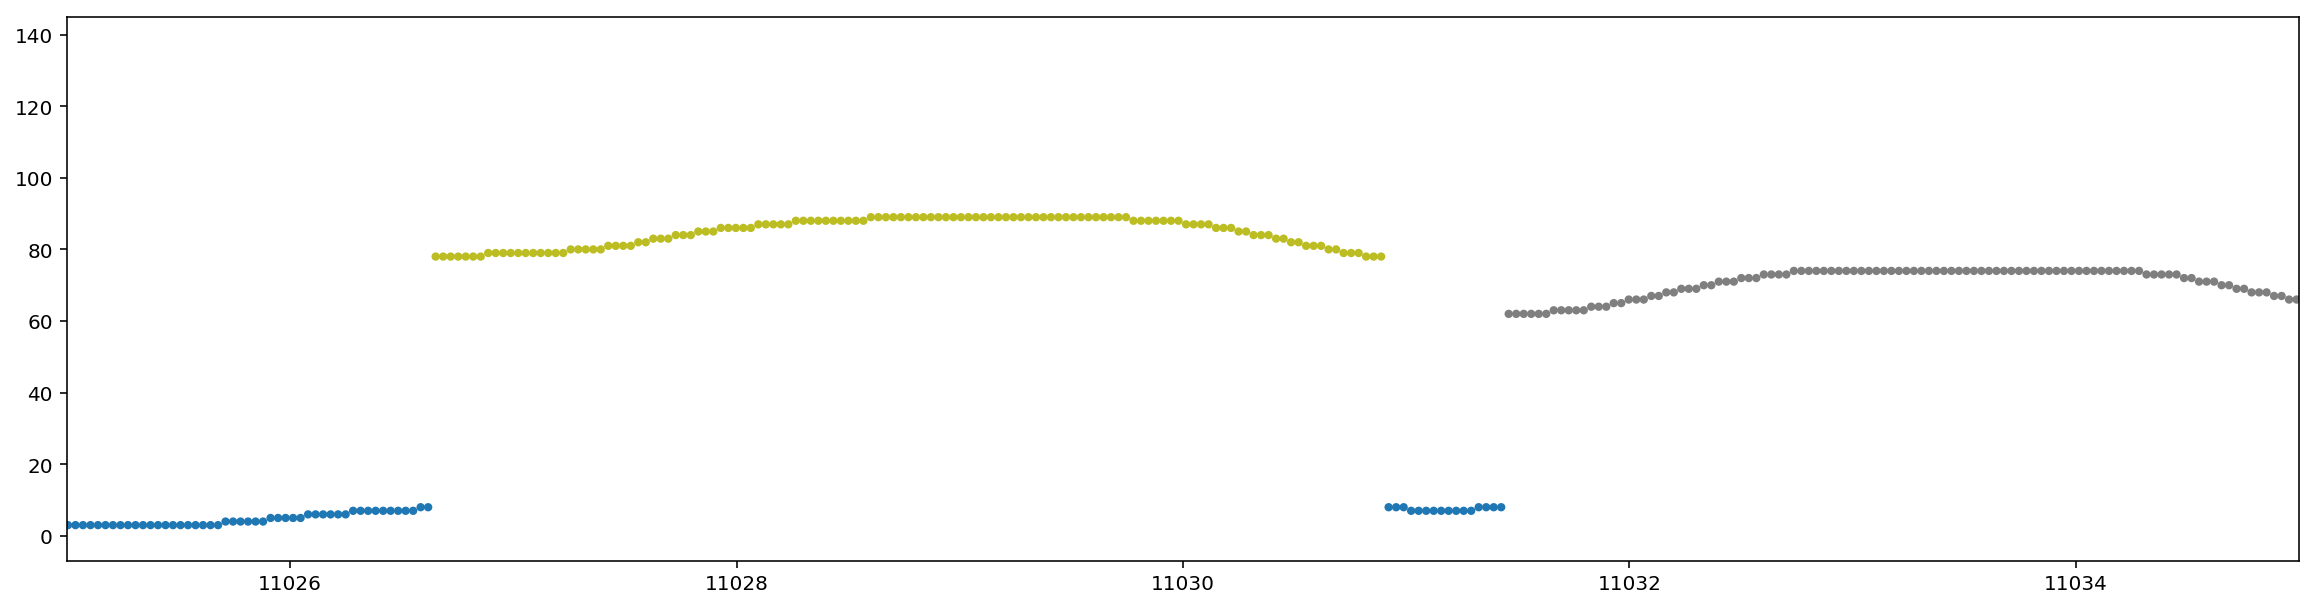

In [81]:
plt.figure(figsize=(20, 5))
time = position_info.index / np.timedelta64(1,'s')
plt.scatter(time, binned_linear_pos,
 s=10, c=newseg, cmap='tab20')
plt.xlim((11025, 11035))

(array([28720.,     0.,  2863.,     0.,  3623.,     0., 73758.,     0.,
         3054.,     0.,  2643.,     0.,  3141.,     0.,  3589.,     0.,
          918.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
          182.,     0.,   140.,     0.,   129.,     0.,   132.,     0.,
          129.,     0.,   124.,     0.,   119.,     0.,   111.,     0.,
          110.,     0.,   126.,     0.,   152.,     0.,   242.,     0.,
         1903.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,   200.,     0.,   145.,     0.,   136.,     0.,
          251.,     0.,   221.,     0.,   124.,     0.,   128.,     0.,
          120.,     0.,   123.,     0.,   130.,     0.,   172.,     0.,
          286.,     0.,  2179.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,   451.,     0.,   334.,     0.,   264.,     0.,
          239.,     0.,   248.,     0.,   228.,     0.,   205.,     0.,
          213.,     0.,   196.,     0.,   227.,     0.,   259., 

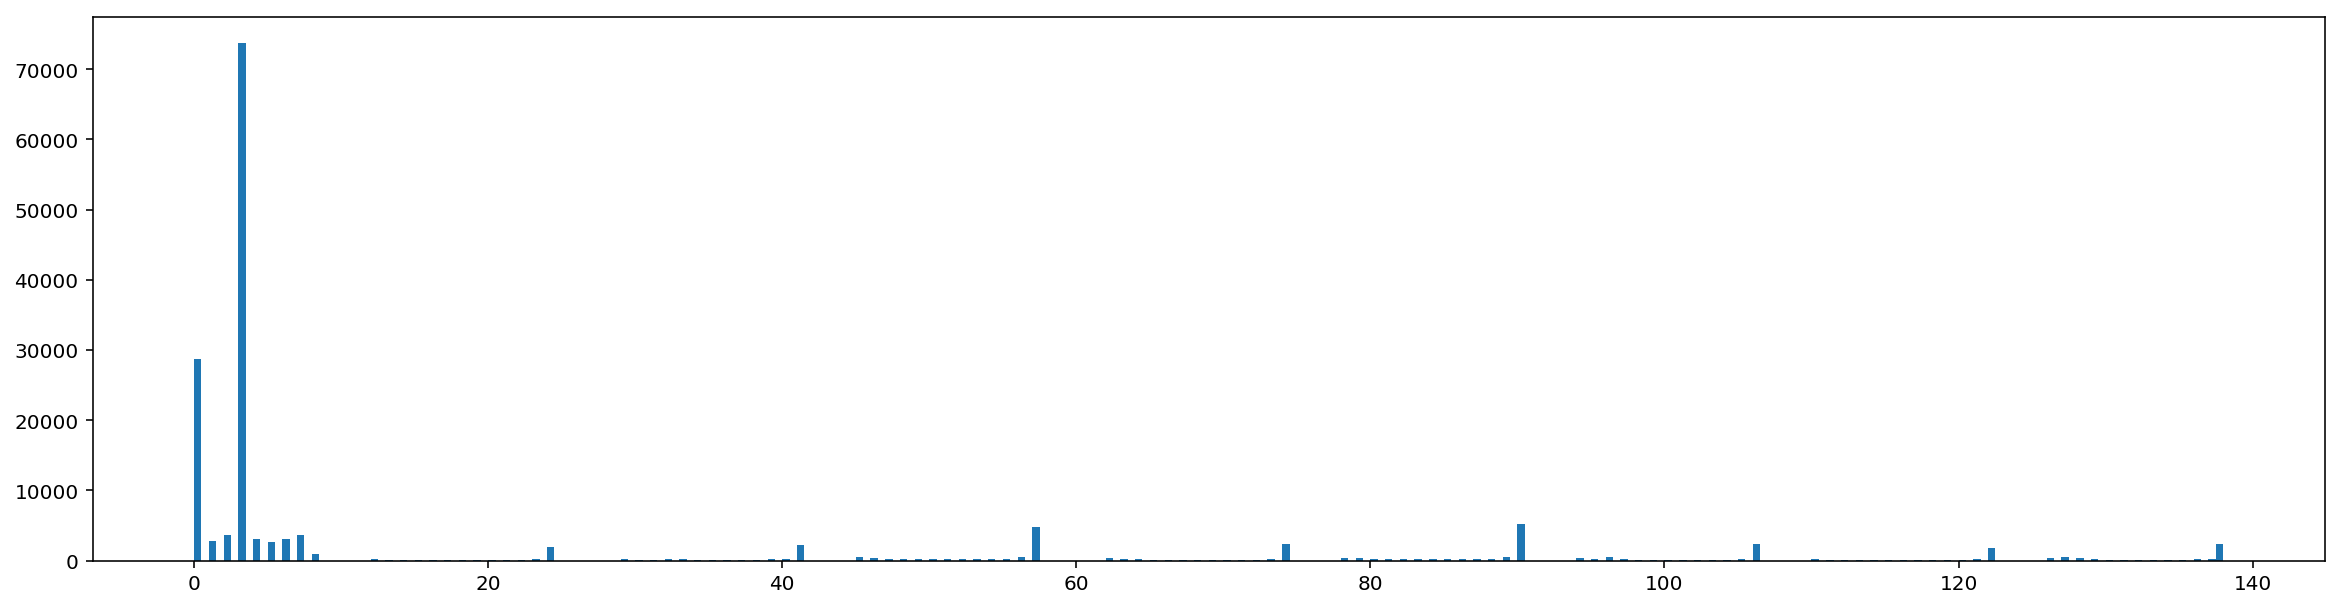

In [122]:
plt.figure(figsize=(20, 5))
plt.hist(binned_linear_pos,np.arange(0,138.5, .5))

In [90]:
binned_linear_pos.max()

138